# Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [ ]:
# TODO: Pré Analise - Baixar arquivo csv do Google Drive e carregar seus dados em um DataFrame pandas

import gdown
import pandas as pd

file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados = pd.read_csv('feedbacks.csv', delimiter=';')

In [ ]:
# TODO: 1 - Implementar a lógica de NPS em comandos simples e sequenciais (imperativo)
import pandas as pd

notas = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
    if nota >= 9:
        promotores += 1
    elif nota <= 6:
        detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(nps)

In [ ]:
# TODO: 2 - Evoluir a implementação para separar melhor as responsabilidades (funcional)
import pandas as pd

def calcular_nps(notas):
    detratores = notas.apply(lambda nota: nota <= 6).sum() # Maneira 1
    promotores = notas[notas >=9].count() # Maneira 2

    nps = (promotores - detratores) / len(notas) * 100
    return nps

notas = dados['nota']

print(calcular_nps(notas))

In [ ]:
# TODO: 3 - Abstrair o problema usando classes e objetos (orientação a objetos)
import pandas as pd

class Feedback:
    def __init__(self, nota, comentario):
        self.nota = nota
        self.comentario = comentario

class AnalisadorFeedback:
    def __init__(self, feedbacks):
        self.feedbacks = feedbacks

    def calcular_nps(self):
        detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
        promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

        nps = (promotores - detratores) / len(self.feedbacks) * 100
        return nps

feedbacks = [Feedback(linha['nota'], linha['comentario']) for i, linha in dados.iterrows()] # Modo 1
# feedbacks = dados.apply(lambda linha: Feedback(linha['nota'], linha['comentario']), axis=1) # Modo 2 - Alternativo

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

# Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

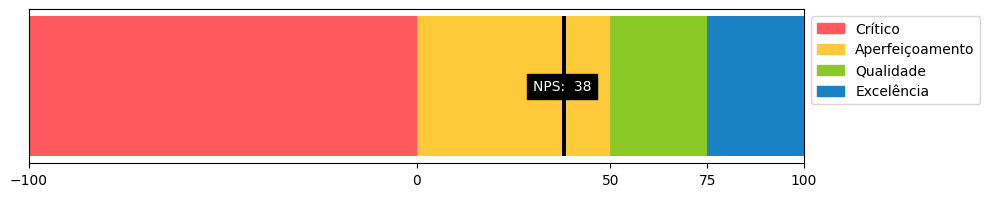

In [62]:
# TODO: Gerar gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def gerar_grafico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 2))
    
    for i, zona in enumerate(NPS_ZONAS):
        ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

    ax.barh([0], width=1, left=nps, color='black')
    ax.set_yticks([])
    ax.set_xticks(NPS_VALORES)
    ax.set_xlim(-100, 100)

    plt.text(nps, 0, f'NPS: {nps: .0f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

    patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
    plt.legend(handles=patches, bbox_to_anchor=(1,1))
    
    plt.show()

gerar_grafico_nps(nps)

# Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.